<a href="https://colab.research.google.com/github/ThePrincipleMan/Predictive-Maintenance/blob/main/Predictive_Maintenance_ML_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive Maintenance Classification and Comparative analysis with different methodologies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Necessary Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/predictive_maintenance.csv')
data.head()
data.shape

(10000, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Removing Unnecessary Columns

In [ ]:
data = data.drop(['UDI','Product ID','Failure Type'],axis=1)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Replacing 'Type' feature with associated numeric values as the feature is ordinal in nature

In [ ]:
data['Type'] = data['Type'].replace(['M','L','H'],[2,1,3])

In [ ]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


##Data Visualization

In [ ]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

Number of Negative Instances-  9661
Number of Positive Instances-  339


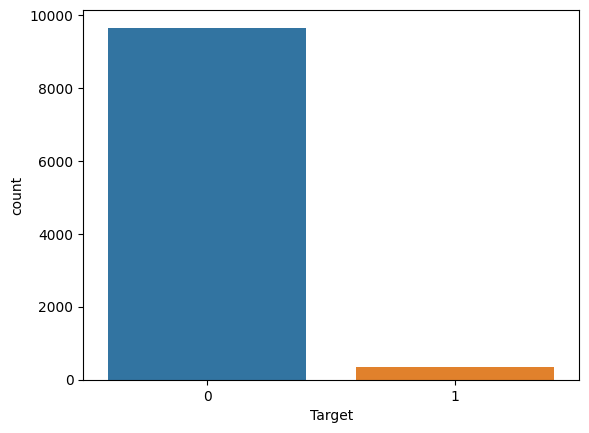

In [ ]:
sns.countplot(data,x='Target',label="Count")
N, Y = data['Target'].value_counts()
print('Number of Negative Instances- ',N)
print('Number of Positive Instances- ',Y)

In [ ]:
data['Type'].value_counts()

1    6000
2    2997
3    1003
Name: Type, dtype: int64

Number of High Instances-  1003
Number of Medium Instances-  2997
Number of Low Instances-  6000


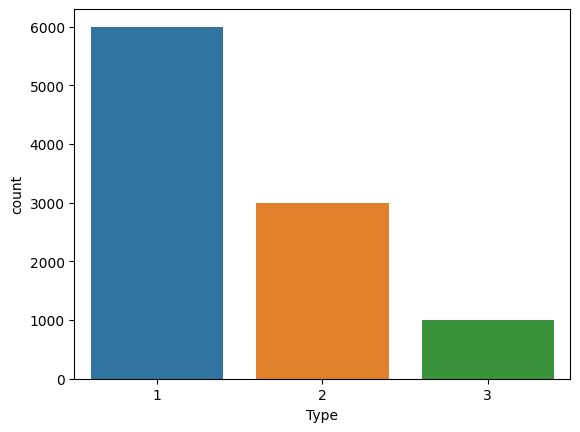

In [ ]:
sns.countplot(data,x='Type',label="Count")
L,M,H = data['Type'].value_counts()
print('Number of High Instances- ',H)
print('Number of Medium Instances- ',M)
print('Number of Low Instances- ',L)

<Axes: >

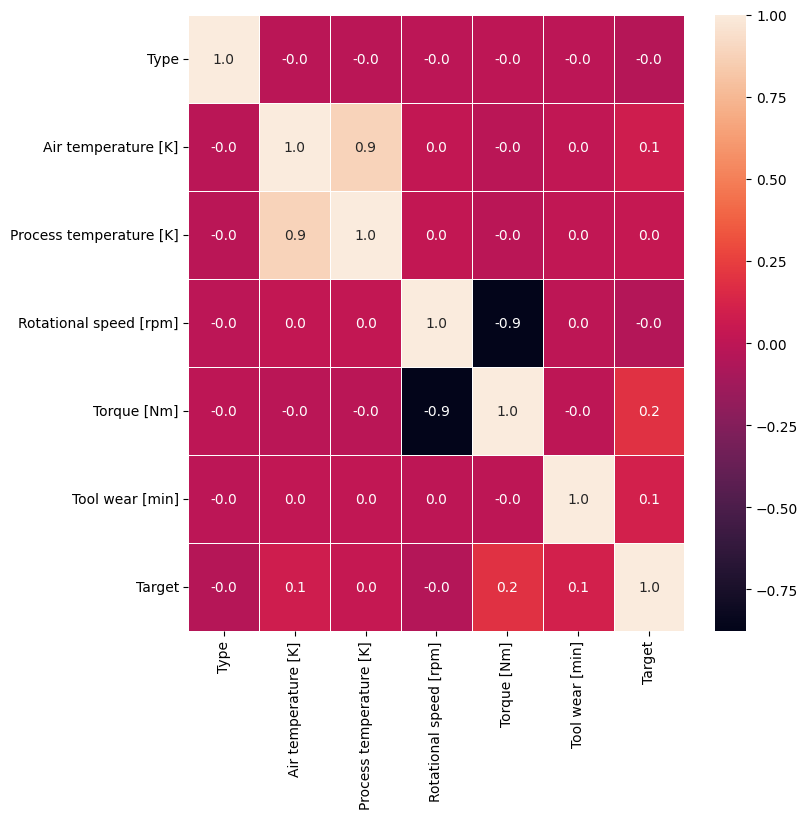

In [ ]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

##Data Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=27, shuffle=True)

##Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train = train_data['Target']
y_test = test_data['Target']

train_data = train_data.drop(['Target'],axis=1)
test_data = test_data.drop(['Target'],axis=1)

scaled_train_data = scaler.fit_transform(train_data.values)
scaled_test_data = scaler.transform(test_data.values)

train_data = pd.DataFrame(scaled_train_data, index = train_data.index, columns = train_data.columns)
test_data = pd.DataFrame(scaled_test_data, index=test_data.index, columns = test_data.columns)

In [ ]:
train_data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
5314,-0.744571,1.805693,1.888490,0.888940,-0.908975,-1.508359
5315,-0.744571,1.805693,1.888490,0.938710,-1.268162,-1.476953
3137,-0.744571,0.203570,-0.066538,0.147922,-0.340261,-0.566167
2614,-0.744571,-0.347160,-0.605856,0.518431,-0.310328,-0.723199
1605,-0.744571,-1.098155,-1.482248,-0.797707,0.258386,-1.335624


In [ ]:
train_data.shape

(8000, 6)

#Classification

##Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel = 'linear')
clf.fit(train_data, y_train)
y_pred_svm = clf.predict(test_data)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Classifier is - ", svm_accuracy)

Accuracy of Support Vector Classifier is -  0.971


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 12, min_samples_split = 5)
dt.fit(train_data, y_train)
y_pred_dt = dt.predict(test_data)
dt_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy of Decision Tree Classifier is - ', dt_accuracy)

Accuracy of Decision Tree Classifier is -  0.971


##K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_data, y_train)
y_pred = knn.predict(test_data)
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of K-Nearest Neighbours is - ", knn_accuracy)

Accuracy of K-Nearest Neighbours is -  0.977


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth = 12, min_samples_split=5)
rf.fit(train_data, y_train)
y_pred_rf = rf.predict(test_data)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier is - ", rf_acc)

Accuracy of Random Forest Classifier is -  0.9845


#Conclusions

From the above, we gained the following insights -

Random Forest Classifier approach gives us the best result which is around 98.5%

KNN follows behind with around 97.5% accuracy

In the end we have Decision Tree Classifier and Support Vector Classification which give us comparable results